In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!gdown --id 1TOAeQXjxtsTwQGH6-pbHPLchtm-mS-QI
!gdown --id 1BQvwhSoeDm-caCImtlbcAMzhI8MDsrCZ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1TOAeQXjxtsTwQGH6-pbHPLchtm-mS-QI
From (redirected): https://drive.google.com/uc?id=1TOAeQXjxtsTwQGH6-pbHPLchtm-mS-QI&confirm=t&uuid=cf5261bb-6a68-4c41-a101-fe1eab72402d
To: /content/data.zip
100% 558M/558M [00:09<00:00, 57.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1BQvwhSoeDm-caCImtlbcAMzhI8MDsrCZ
From (redirected): https://drive.google.com/uc?id=1BQvwhSoeDm-caCImtlbcAMzhI8MDsrCZ&confirm=t&uuid=f562ec97-3333-4a13-b062-2b1a78c89651
To: /content/public test.zip
10

In [2]:
!unzip -q "data.zip"
!unzip -q "public test.zip"

# Histogram features

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import shutil

In [ ]:
# chia ra các folder
from pathlib import Path
daytime = Path("daytime")
nighttime = Path("nighttime")

daytime.mkdir(parents=True, exist_ok=True)
nighttime.mkdir(parents=True, exist_ok=True)

print("Tạo 2 folder thành công")

Tạo 2 folder thành công


In [ ]:
class HistogramDayNightClassifier:
    def __init__(self, daytime, nighttime, brightness_threshold=100, dark_ratio_threshold=0.5):
      self.daytime = Path(daytime)
      self.nighttime = Path(nighttime)
      self.brightness_threshold = brightness_threshold
      self.dark_ratio_threshold = dark_ratio_threshold

    def compute_histogram(self, image):
      if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      else:
        gray = image

      hist = cv2.calcHist(gray, [0], None, [256], [0, 256])

      hist = hist.ravel() / hist.sum()

      return hist, gray

    def analyze_brightness_distribution(self, hist):
        """Phân tích phân bố độ sáng"""
        # Tính tỷ lệ pixel tối
        dark_pixels_ratio = sum(hist[:self.brightness_threshold])
        # Tính độ sáng trung bình
        avg_brightness = sum(i * hist[i] for i in range(256))
        return dark_pixels_ratio, avg_brightness

    def classify(self, image_path):
      image = cv2.imread(image_path)

      hist, gray = self.compute_histogram(image)

      dark_ratio, avg_brightness = self.analyze_brightness_distribution(hist)

      is_night = dark_ratio > self.dark_ratio_threshold

      if is_night:
        mode = "nighttime"
        target_folder = self.nighttime
      else:
        mode = "daytime"
        target_folder = self.daytime

      target_path = target_folder / Path(image_path).name
      shutil.copy(image_path, target_path)
      return mode

In [ ]:
def plot_analysis(image, hist, brightness_threshold):
        """Vẽ đồ thị phân tích"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Hiển thị ảnh gốc
        ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax1.set_title(f'Original Image')
        ax1.axis('off')

        # Vẽ histogram
        ax2.plot(hist)
        ax2.set_title('Brightness Histogram')
        ax2.axvline(x=brightness_threshold, color='r', linestyle='--',
                   label=f'Threshold ({brightness_threshold})')
        ax2.set_xlabel('Pixel Intensity')
        ax2.set_ylabel('Frequency')
        ax2.legend()

        plt.tight_layout()
        return fig

In [ ]:
folder_image = "public test"
list_image = list(sorted(os.listdir(folder_image)))
#Tạo đường dẫn cho ảnh
file_path = [os.path.join(folder_image, image) for image in list_image]
file_path[0]

'public test/cam_08_00500_jpg.rf.5151346676b87b9d97d375b50e60a9b8.jpg'

In [ ]:
img = cv2.imread('/content/public test/cam_10_00573.jpg')
img.shape

(720, 1280, 3)

In [ ]:
hist = HistogramDayNightClassifier(daytime, nighttime)
histogram, gray = hist.compute_histogram(img)

histogram

array([0.75      , 0.00234375, 0.        , 0.00078125, 0.        ,
       0.        , 0.        , 0.00078125, 0.        , 0.        ,
       0.00078125, 0.        , 0.00078125, 0.        , 0.00078125,
       0.00078125, 0.        , 0.00078125, 0.        , 0.00703125,
       0.        , 0.        , 0.00078125, 0.        , 0.        ,
       0.        , 0.00078125, 0.00078125, 0.        , 0.0015625 ,
       0.        , 0.0015625 , 0.00703125, 0.00078125, 0.0078125 ,
       0.        , 0.0015625 , 0.        , 0.00234375, 0.0015625 ,
       0.0078125 , 0.0078125 , 0.0078125 , 0.015625  , 0.01953125,
       0.00859375, 0.00859375, 0.0140625 , 0.01953125, 0.00234375,
       0.00234375, 0.00625   , 0.01484375, 0.0078125 , 0.0265625 ,
       0.01328125, 0.01484375, 0.00078125, 0.00703125, 0.00078125,
       0.00078125, 0.00078125, 0.        , 0.00078125, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

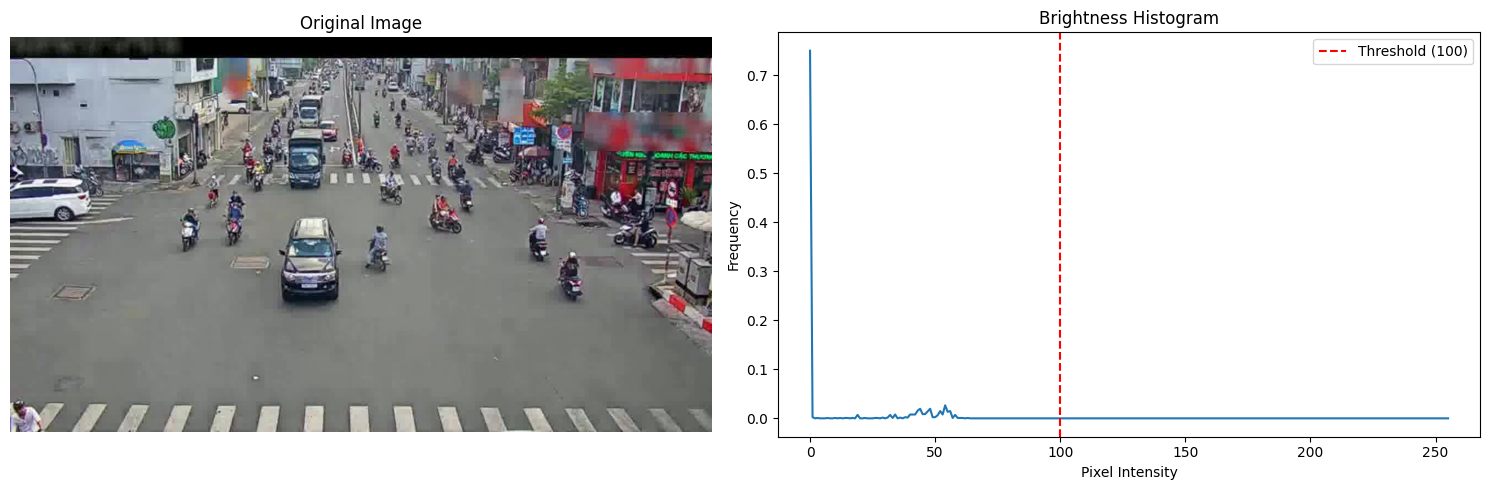

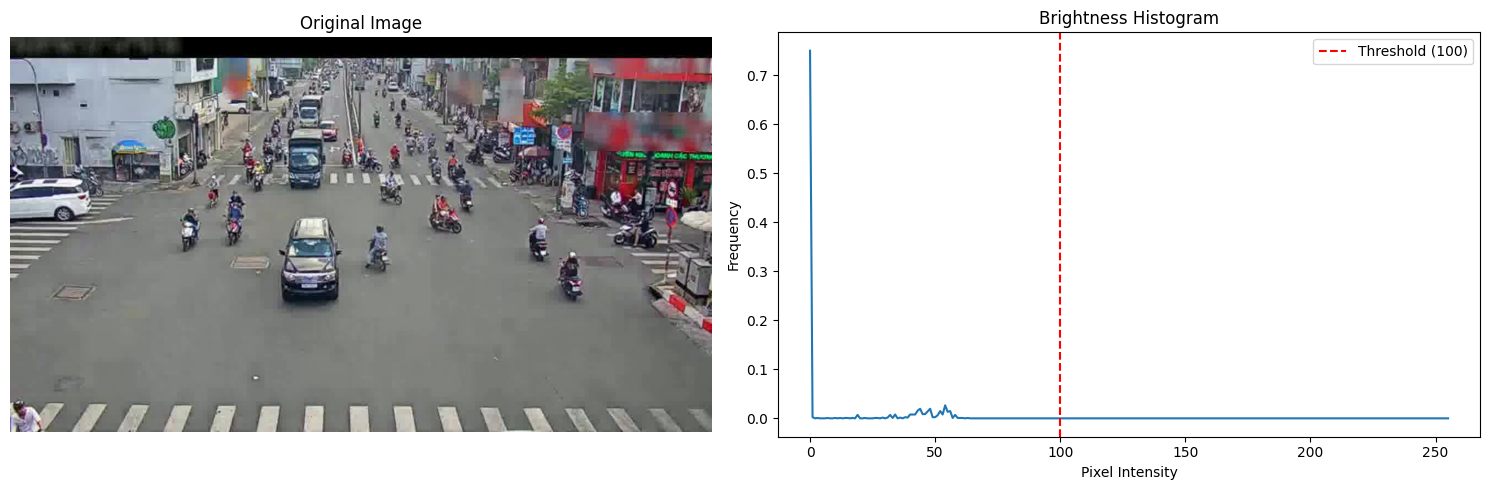

In [ ]:
plot_analysis(img, histogram, 100)

In [ ]:
dark, brightness = hist.analyze_brightness_distribution(histogram)
dark, brightness

(1.0000000009313226, 11.319531296147034)

# Split data folder into daytime and nighttime folder

In [ ]:
from tqdm.auto import tqdm
for image_path in tqdm(file_path, total=len(file_path)):
  mode = hist.classify(image_path)
  print(mode)

  0%|          | 0/2060 [00:00<?, ?it/s]

nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime
nighttime


In [ ]:
folder_daytime_drive = Path('/content/drive/MyDrive/Deep Learning/daytime')
folder_path_notebook_daytime = Path('/content/daytime')
shutil.copytree(folder_path_notebook_daytime, folder_daytime_drive)
print("Sao chép folder ở notebook vào drive thành công")

Sao chép folder ở notebook vào drive thành công


In [ ]:
folder_nighttime_drive = Path('/content/drive/MyDrive/Deep Learning/nighttime')
folder_path_notebook_nighttime = Path('/content/nighttime')
shutil.copytree(folder_path_notebook_nighttime, folder_nighttime_drive)
print("Sao chép folder ở notebook vào drive thành công")

Sao chép folder ở notebook vào drive thành công


# Classification daytime and nighttime

In [16]:
!pip install torchinfo --quiet

In [17]:
import torch
from torch import nn
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
from torchvision import transforms
from pathlib import Path
import os
from torch.utils.data import DataLoader
from torchinfo import summary

In [ ]:
class DayNightClassifier(torch.nn.Module):
    def __init__(self, input_shape, hidden_unit, output_shape):
        super().__init__()
        self.classifier = torch.nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, output_shape)  # 2 classes: day/night
        )

    def forward(self, x):
        x = self.classifier(x)
        return x

In [18]:
def get_file_path(folder):
    data = []
    sub_folders = list(sorted(os.listdir(folder)))
    sub_folder_paths = [os.path.join(folder, sub_folder) for sub_folder in sub_folders]
    # Kiểm tra tập train hay test
    try:
        contents = os.listdir(sub_folder_paths[0])
        if contents:
            # Duyêt qua tập daytime và nighttime
            for sub_folder_path in sub_folder_paths:
                data_paths = list(sorted(os.listdir(sub_folder_path)))
                data_path_file = [os.path.join(sub_folder_path, data_path) for data_path in data_paths]
                data.extend(data_path_file)

            return {'folder': 'train', 'file_train': data}
    except NotADirectoryError:
        return {'folder': 'test', 'file_test': sub_folder_paths}

class TrafficVehicle(Dataset):
    def __init__(self, folder: str, transforms=None):
        """
            transform_box sẽ chuyển tọa độ bounding box sang để phù hợp với các model, có hai kiểu để chuyển đổi
            là "center" hoặc "corner", mặc định là "center". Nếu transform_type="center" thì mặc định các model sử dụng bounding box
            theo tọa độ tâm và kích thước. Ngược lại, transform_type="corner" các model sẽ sử dụng bounding box theo tọa độ góc.

            Ví dụ: trong bài toán object detection các tọa độ bounding box thường chia thành hai kiểu:
                - (x_min, y_min, x_max, y_max)
                - (x_center, y_center, width, height)

            Lưu ý: Do trong quá trình gán nhãn theo định dạng YOLO (x_center, y_center, width, height) nên không cần transform_box nữa.
        """
        self.data = get_file_path(folder)
        self.transforms = transforms

        if self.data['folder'] == 'train':
            self.image, self.txt = [], []
            for train_path in self.data['file_train']:
                train_path_split = train_path.split('.')
                # Kiểm tra là txt hay là image
                if train_path_split[-1] == 'txt':
                    self.txt.append(train_path)
                else:
                    self.image.append(train_path)
        else:
            self.image = [image_path for image_path in self.data['file_test']]
        self.class_name = {0: "daytime", 1: "nighttime"}
        self.class_to_idx = {"daytime": 0, "nighttime": 1}
    def load_image(self, index):
        img = Image.open(self.image[index])
        return img
    def __len__(self):
        return len(self.image)
    def __getitem__(self, index: int):
        img = self.load_image(index)
        file_path = os.path.basename(self.image[index])
        if self.data['folder'] == 'train':
            label = Path(self.image[index]).parent.name
            if self.transforms is not None:
              return self.transforms(img), self.class_to_idx[label]
        else:
            if self.transforms is not None:
                img = self.transforms(img)
            return img, file_path

In [19]:
transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])
train_data = TrafficVehicle("data/train", transforms=transform)
val_data = TrafficVehicle("data/val", transforms=transform)
test_data = TrafficVehicle("public test", transforms=transform)

In [20]:
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

## SVM

In [ ]:
all_features = []
all_labels = []

for image, label in train_dataloader:
  # Flatten batch (N, 3, 32, 32) thành (N, 3*32*32)
  batch_feature = image.view(image.size(0), -1).numpy()
  batch_label = label.numpy()

  all_features.append(batch_feature)
  all_labels.append(batch_label)

X_train = np.vstack(all_features)
y_train = np.hstack(all_labels)

In [ ]:
val_features = []
val_labels = []

for image, label in val_dataloader:
  batch_feature = image.view(image.size(0), -1).numpy()
  batch_label = label.numpy()

  val_features.append(batch_feature)
  val_labels.append(batch_label)

X_val = np.vstack(val_features)
y_val = np.hstack(val_labels)

In [ ]:
from sklearn.svm import SVC
model_svc = SVC(C=1.0)
model_svc.fit(X_train, y_train)

## Neural Network

In [ ]:
print(f"Shape of input: {train_data[0][0].shape}")

Shape of input: torch.Size([3, 224, 224])


In [ ]:
flatten = nn.Flatten()
print(f"Shape of input after flatting: {flatten(train_data[0][0].unsqueeze(0)).shape}")

Shape of input after flatting: torch.Size([1, 150528])


In [ ]:
model_1 = DayNightClassifier(input_shape=150528,
                             hidden_unit=8,
                             output_shape=1)
print(summary(model_1, input_size=[1, 3, 224, 224], col_names=['num_params', 'input_size' ,'trainable']))

Layer (type:depth-idx)                   Param #                   Input Shape               Trainable
DayNightClassifier                       --                        [1, 3, 224, 224]          True
├─Sequential: 1-1                        --                        [1, 3, 224, 224]          True
│    └─Flatten: 2-1                      --                        [1, 3, 224, 224]          --
│    └─Linear: 2-2                       2,408,464                 [1, 150528]               True
│    └─ReLU: 2-3                         --                        [1, 16]                   --
│    └─Linear: 2-4                       17                        [1, 16]                   True
Total params: 2,408,481
Trainable params: 2,408,481
Non-trainable params: 0
Total mult-adds (M): 2.41
Input size (MB): 0.60
Forward/backward pass size (MB): 0.00
Params size (MB): 9.63
Estimated Total Size (MB): 10.24


In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
y_logits = model_1(train_data[0][0].to(device).unsqueeze(0))
y_pred = torch.sigmoid(y_logits)
print(y_pred)
y_pred = torch.round(y_pred)
print(y_pred)

tensor([[0.5215]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[1.]], device='cuda:0', grad_fn=<RoundBackward0>)


In [ ]:
def accuracy_fn(y_true, y_pred):
  equal = torch.eq(y_true, y_pred)
  acc = equal.sum().item()
  return acc / len(y_true)

In [ ]:
from tqdm.auto import tqdm
def train_step(train_dataloader, loss_fn, optimizer, model_1, device):
  model_1.train()
  model_1 = model_1.to(device)
  train_loss = 0
  train_acc = 0
  for X_train, y_train in tqdm(train_dataloader, total=len(train_dataloader)):
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train.float())
    train_loss += loss
    acc = accuracy_fn(y_train, y_pred)
    train_acc += acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  return train_loss, train_acc

def val_step(val_dataloader, loss_fn, model_1, device):
  model_1.eval()
  model_1 = model_1.to(device)
  val_loss = 0
  val_acc = 0
  with torch.inference_mode():
    for X_val, y_val in tqdm(val_dataloader, total=len(val_dataloader)):
      X_val, y_val = X_val.to(device), y_val.to(device)
      y_logits = model_1(X_val).squeeze()
      y_pred = torch.round(torch.sigmoid(y_logits))

      loss = loss_fn(y_logits, y_val.float())
      val_loss += loss
      acc = accuracy_fn(y_val, y_pred)
      val_acc += acc

    val_loss /= len(val_dataloader)
    val_acc /= len(val_dataloader)

    return val_loss, val_acc

In [ ]:
torch.manual_seed(42)
epochs = 5
results = {
    "epoch": [],
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}
for epoch in range(epochs):
  print(f"Epoch {epoch + 1}/{epochs}")
  train_loss, train_acc = train_step(train_dataloader, loss_fn, optimizer, model_1, device)
  val_loss, val_acc = val_step(val_dataloader, loss_fn, model_1, device)

  print(f"Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} | Val loss: {val_loss:.4f} Val acc: {val_acc:.4f}")
  results["epoch"].append(epoch + 1)
  results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
  results["train_acc"].append(train_acc)
  results["val_loss"].append(val_loss.item() if isinstance(val_loss, torch.Tensor) else val_loss)
  results["val_acc"].append(val_acc)

Epoch 1/5


  0%|          | 0/296 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Train loss: 0.2537 Train acc: 0.9754 | Val loss: 0.1552 Val acc: 1.0000
Epoch 2/5


  0%|          | 0/296 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Train loss: 0.1583 Train acc: 0.9998 | Val loss: 0.1095 Val acc: 1.0000
Epoch 3/5


  0%|          | 0/296 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Train loss: 0.1181 Train acc: 1.0000 | Val loss: 0.0839 Val acc: 1.0000
Epoch 4/5


  0%|          | 0/296 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Train loss: 0.0927 Train acc: 1.0000 | Val loss: 0.0676 Val acc: 1.0000
Epoch 5/5


  0%|          | 0/296 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Train loss: 0.0757 Train acc: 1.0000 | Val loss: 0.0569 Val acc: 1.0000


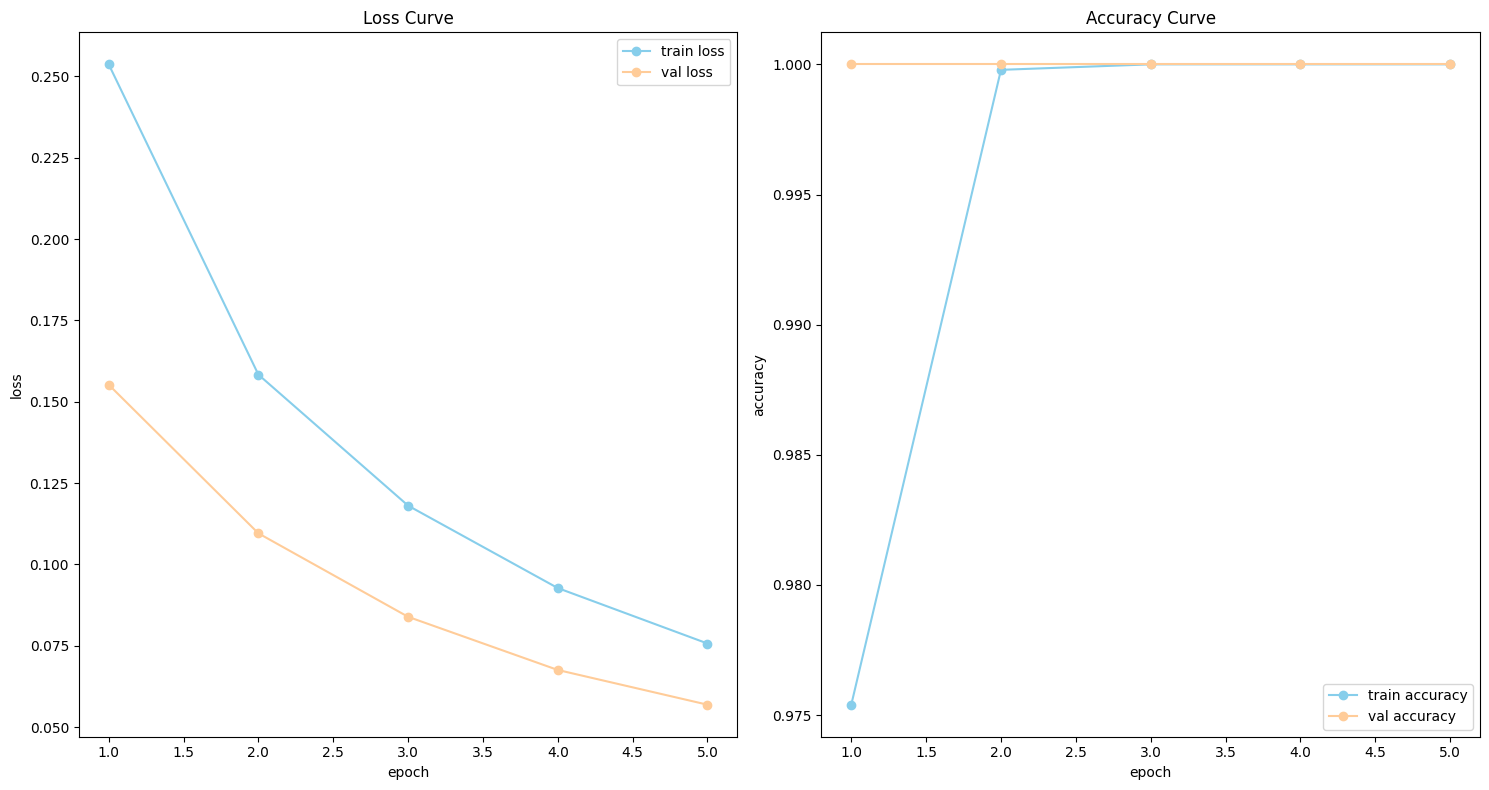

In [ ]:
import matplotlib.pyplot as plt
epoch = np.array(results["epoch"])
train_loss = np.array(results["train_loss"]).ravel()
val_loss = np.array(results["val_loss"]).ravel()
train_acc = np.array(results["train_acc"])
val_acc = np.array(results["val_acc"])

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes[0].plot(epoch, train_loss, color='#87CEEB', marker='o', label="train loss")
axes[0].plot(epoch, val_loss, color="#FFCC99", marker='o', label='val loss')
axes[0].set_title("Loss Curve")
axes[0].set_xlabel("epoch")
axes[0].set_ylabel("loss")
axes[0].legend()

axes[1].plot(epoch, train_acc, color='#87CEEB', marker='o', label="train accuracy")
axes[1].plot(epoch, val_acc, color="#FFCC99", marker='o', label='val accuracy')
axes[1].set_title("Accuracy Curve")
axes[1].set_xlabel("epoch")
axes[1].set_ylabel("accuracy")
axes[1].legend()

plt.tight_layout()
plt.savefig("results.png")
plt.show()

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_classification.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
# chia ra các folder
from pathlib import Path
daytime = Path("daytime")
nighttime = Path("nighttime")

daytime.mkdir(parents=True, exist_ok=True)
nighttime.mkdir(parents=True, exist_ok=True)

print("Tạo 2 folder thành công")

Tạo 2 folder thành công


In [ ]:
import shutil
with torch.inference_mode():
  for X_test, image_path in tqdm(test_dataloader, total=len(test_dataloader)):
    X_test = X_test.to(device)
    y_logits = model_1(X_test)

    y_preds = torch.round(torch.sigmoid(y_logits))

    for y_pred, img_path in zip(y_preds, image_path):
      if int(y_pred) == 0:
        target_folder = daytime
      else:
        target_folder = nighttime

      target_path = target_folder / Path(img_path).name

      shutil.copy(os.path.join("public test", img_path), target_path)

  0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
folder_daytime_drive = Path('/content/drive/MyDrive/Deep Learning/daytime')
folder_path_notebook_daytime = Path('/content/daytime')
shutil.copytree(folder_path_notebook_daytime, folder_daytime_drive)
print("Sao chép folder daytime ở notebook vào drive thành công")

Sao chép folder daytime ở notebook vào drive thành công


In [ ]:
folder_nighttime_drive = Path('/content/drive/MyDrive/Deep Learning/nighttime')
folder_path_notebook_nighttime = Path('/content/nighttime')
shutil.copytree(folder_path_notebook_nighttime, folder_nighttime_drive)
print("Sao chép folder nighttime ở notebook vào drive thành công")

Sao chép folder nighttime ở notebook vào drive thành công


# Load model

In [9]:
class DayNightClassifier(torch.nn.Module):
    def __init__(self, input_shape, hidden_unit, output_shape):
        super().__init__()
        self.classifier = torch.nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, output_shape)  # 2 classes: day/night
        )

    def forward(self, x):
        x = self.classifier(x)
        return x

In [7]:
from pathlib import Path
import requests

if Path("model_classification.pth").exists():
  print(f"file đã tồn tại")
else:
  request = requests.get(url="https://github.com/nguyenquan132/Traffic-Vehicle-Detection-in-Normal-and-Adverse-Environmental-Conditions/raw/refs/heads/master/model_classification.pth")
  with open("model_classification.pth", 'wb') as f:
    f.write(request.content)

In [14]:
import torch
from torch import nn
model = DayNightClassifier(input_shape=150528,
                            hidden_unit=8,
                             output_shape=1)
model.load_state_dict(torch.load("model_classification.pth"))

print(model)

<ipython-input-14-4573c52a0f02>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_classification.pth"))


DayNightClassifier(
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=150528, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [22]:
model.eval()
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
with torch.inference_mode():
  for X_test, img_path in test_dataloader:
    X_test = X_test.to(device)
    y_logits = model(X_test)
    y_pred = torch.round(torch.sigmoid(y_logits))

    print(y_pred)
    break

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')
